### Problem 2.2: Explore the $\theta$-rule for exponential growth
#### a)

In [1]:
import numpy as np
def solver(I, a, T, dt, theta):
    """Solve u'=-a*u, u(0)=I, for t in (0, T] with steps of dt."""
    Nt = int(T/dt)            # no of time intervals
    T = Nt*dt                 # adjust T to fit time step dt
    u = np.zeros(Nt+1)           # array of u[n] values
    t = np.linspace(0, T, Nt+1)  # time mesh
    u[0] = I                  # assign initial condition
    u[1:] = (1 - (1-theta)*a*dt)/(1 + theta*dt*a)
    u[:] = np.cumprod(u)
    return u, t

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_u(a = -1, thetas = [0, 0.5, 1], T=8, dt=0.5, I = 1):
    for theta in thetas:
        u, t = solver(I, a, T, dt, theta)
        plt.plot(t, u, label=fr"$\theta$ ={theta}")

    plt.plot(np.linspace(0,T,101), np.exp(np.linspace(0,T,101)), label="Exact", linestyle="--", color="black")
    plt.legend()
    plt.grid(True)
    plt.show()

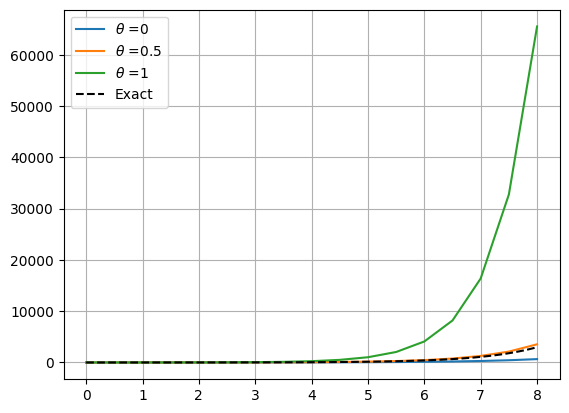

In [31]:
#dt = 0.5
plot_u()

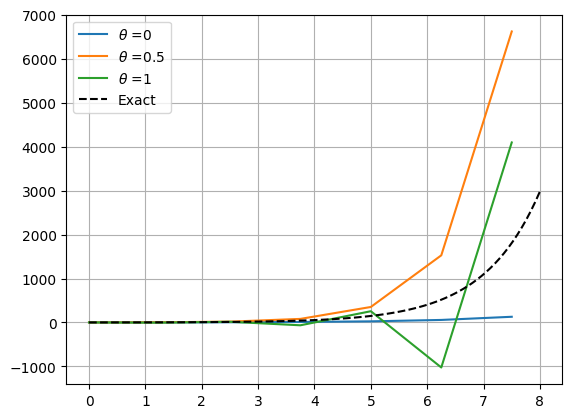

In [32]:
#dt = 1.25
plot_u(dt = 1.25)

# Oscillations for theta = 1

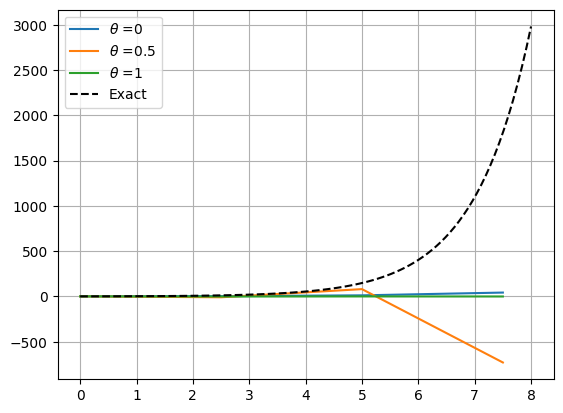

In [39]:
#dt = 2.1
plot_u(dt = 2.5)

#Oscillations for theta = 1 and theta = 0.5

#### b)

In [26]:
def A_exact(p):
    return np.exp(p)


def A(p, theta):
    return (1 - (1 - theta) * (-p)) / (1 + theta * (-p))

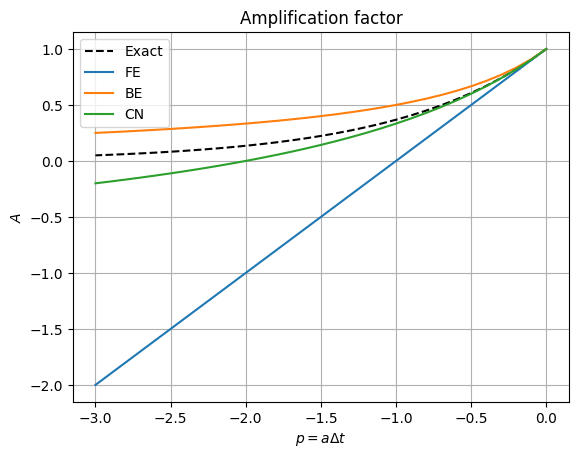

In [27]:
models = {'FE': 0, 'BE': 1, 'CN': 0.5}
a = -1
dt = np.linspace(0, 3, 31)
p = a*dt

plt.plot(p, A_exact(p), label="Exact", linestyle="--", color="black")
for model, theta in models.items():
    plt.plot(p, A(p, theta), label=model)

plt.legend()
plt.xlabel(r"$p=a\Delta t$")
plt.ylabel(r"$A$")
plt.title("Amplification factor")
plt.grid(True)
plt.show()

The oscillations observed for $\theta = 1$ at $\Delta t =1.25$ and $\theta = 0.5,\ 1$ at $\Delta t =2.5$ (and no oscillations for any $\theta$ at $\Delta t = 0.5$) matches our prediction in way of number of models with oscillations (they should have oscillations when $A<0$), however we get oscillations on the wrong models. Compared to our plot of $A$